__Teammates__

* Jorge Armando Jimenez

* Salvador Pluma

* Emmanuel de la Cruz

__Instructions__:

1. You will work on one of the datasets available on kaggle repository around COVID-19 (https://www.kaggle.com/). See the document  Descargar documentfor detailed specifications and chose a specific challenge.

2. Develop a Python notebook (file with termination “ipynb”), which will include the application of three classifiers, using the sklearn library, and eventually using a percentage T% of the samples.

3. Describe the learning process and the test results in a very well explained notebook that includes title, authors, summary, description of the work done (here will be the code), results (of the performance tests and their explanation), discussion and conclusions, with bibliographic references at the end.


__Importing Libraries__

In [1]:
# Basic Libs
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd
from scipy import stats
import seaborn as sns

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Plotting libs
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Loading data

In [2]:
data_cv = pd.read_csv('./input/kaggle/country_vaccinations.csv')
data_cvbm = pd.read_csv('./input/kaggle/country_vaccinations_by_manufacturer.csv')

In [3]:
data_cv.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [6]:
data_cv.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [7]:
data_cvbm.isna()

,location,date,vaccine,total_vaccinations
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
35618,False,False,False,False
35619,False,False,False,False
35620,False,False,False,False
35621,False,False,False,False


In [8]:
mex_cv = data_cv[data_cv['iso_code'] == 'MEX']

In [15]:
mex_cv.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
49887,Mexico,MEX,2020-12-24,2924.0,2924.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49888,Mexico,MEX,2020-12-25,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49889,Mexico,MEX,2020-12-26,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49890,Mexico,MEX,2020-12-27,6824.0,6824.0,NaN,NaN,1300.0,0.01,0.01,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49891,Mexico,MEX,2020-12-28,9579.0,9579.0,NaN,2755.0,1664.0,0.01,0.01,NaN,13.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...


In [16]:
r = mex_cv.dtypes
r

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [12]:
mex_cv['date'] = pd.to_datetime(mex_cv['date'])

In [18]:
mex_cv = mex_cv.sort_values(by='date')

In [20]:
mex_cv

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
49887,Mexico,MEX,2020-12-24,2924.0,2924.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49888,Mexico,MEX,2020-12-25,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49889,Mexico,MEX,2020-12-26,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49890,Mexico,MEX,2020-12-27,6824.0,6824.0,NaN,NaN,1300.0,0.01,0.01,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
49891,Mexico,MEX,2020-12-28,9579.0,9579.0,NaN,2755.0,1664.0,0.01,0.01,NaN,13.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50343,Mexico,MEX,2022-03-25,189804498.0,85556080.0,79625736.0,NaN,234906.0,145.71,65.68,61.13,1803.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
50344,Mexico,MEX,2022-03-26,190197035.0,85566651.0,79662373.0,392537.0,247902.0,146.01,65.69,61.16,1903.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
50345,Mexico,MEX,2022-03-27,190337668.0,85573127.0,79686428.0,140633.0,224913.0,146.12,65.69,61.17,1727.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
50346,Mexico,MEX,2022-03-28,190441475.0,85575818.0,79693409.0,103807.0,226775.0,146.20,65.70,61.18,1741.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...


In [21]:
mex_cv.dropna(inplace=True)

In [24]:
mex_cv

,index,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,49909,Mexico,MEX,2021-01-15,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
1,49910,Mexico,MEX,2021-01-16,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
2,49911,Mexico,MEX,2021-01-17,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
3,49912,Mexico,MEX,2021-01-18,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
4,49913,Mexico,MEX,2021-01-19,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,50341,Mexico,MEX,2022-03-23,189083111.0,85538032.0,79562871.0,197446.0,271794.0,145.16,65.67,61.08,2087.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
312,50344,Mexico,MEX,2022-03-26,190197035.0,85566651.0,79662373.0,392537.0,247902.0,146.01,65.69,61.16,1903.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
313,50345,Mexico,MEX,2022-03-27,190337668.0,85573127.0,79686428.0,140633.0,224913.0,146.12,65.69,61.17,1727.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
314,50346,Mexico,MEX,2022-03-28,190441475.0,85575818.0,79693409.0,103807.0,226775.0,146.20,65.70,61.18,1741.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...


In [23]:
mex_cv.reset_index(inplace=True)

<AxesSubplot:xlabel='index'>

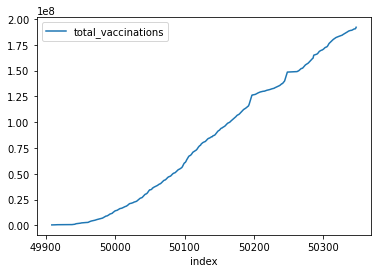

In [26]:
mex_cv.plot(x = 'index', y = 'total_vaccinations')

In [41]:
year21 = mex_cv[(mex_cv['date'] >= '2021-01-01')&(mex_cv['date'] <= '2021-12-31')]

In [42]:
year21

,index,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,49909,Mexico,MEX,2021-01-15,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
1,49910,Mexico,MEX,2021-01-16,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
2,49911,Mexico,MEX,2021-01-17,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
3,49912,Mexico,MEX,2021-01-18,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
4,49913,Mexico,MEX,2021-01-19,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,50237,Mexico,MEX,2021-12-09,135481459.0,79202068.0,65630611.0,459229.0,317890.0,104.01,60.80,50.38,2440.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
257,50240,Mexico,MEX,2021-12-12,137169511.0,80388496.0,66150375.0,340364.0,399884.0,105.30,61.71,50.78,3070.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
258,50241,Mexico,MEX,2021-12-13,137357032.0,80503005.0,66225140.0,187521.0,395629.0,105.45,61.80,50.84,3037.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
259,50244,Mexico,MEX,2021-12-16,139820373.0,81785946.0,66586509.0,968736.0,619845.0,107.34,62.79,51.12,4758.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...


<AxesSubplot:xlabel='index'>

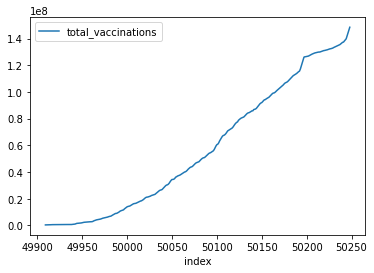

In [44]:
year21.plot(x = 'index', y = 'total_vaccinations')

In [47]:
year22 = mex_cv[(mex_cv['date'] >= '2022-01-01')&(mex_cv['date'] <= '2022-12-31')]

<AxesSubplot:xlabel='index'>

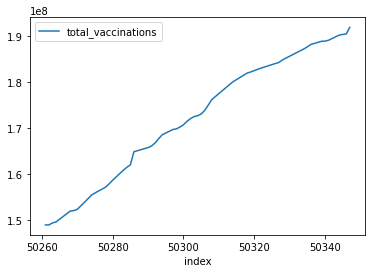

In [48]:
year22.plot(x = 'index', y = 'total_vaccinations')

In [68]:
def show_vaccinations_per_month(year, df):
    year_str_init = str(str(year) + '-01-01')
    year_str_end = str(str(year)+'-12-31')
    aux = df[(df['date'] >= year_str_init)&(df['date'] <= year_str_end)]
    title_s = 'Total vaccionations in '+str(year)
    aux.plot(x='index', y = 'total_vaccinations', title=title_s)

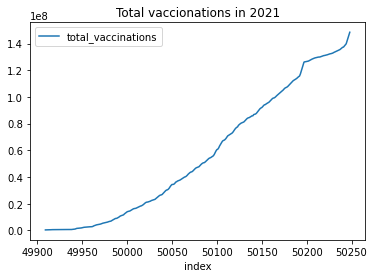

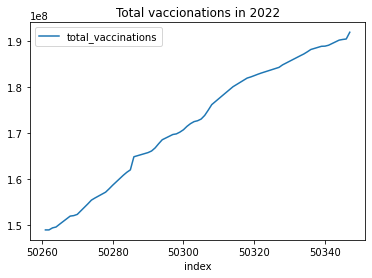

In [69]:
for year in [2021,2022]:
    show_vaccinations_per_month(year, mex_cv)

In [64]:
mex_cv['yyyy'] = pd.to_datetime(mex_cv['date']).dt.year
mex_cv['mm'] = pd.to_datetime(mex_cv['date']).dt.month

In [65]:
mex_cv

,index,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,yyyy,mm
0,49909,Mexico,MEX,2021-01-15,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2021,1
1,49910,Mexico,MEX,2021-01-16,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2021,1
2,49911,Mexico,MEX,2021-01-17,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2021,1
3,49912,Mexico,MEX,2021-01-18,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2021,1
4,49913,Mexico,MEX,2021-01-19,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,50341,Mexico,MEX,2022-03-23,189083111.0,85538032.0,79562871.0,197446.0,271794.0,145.16,65.67,61.08,2087.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2022,3
312,50344,Mexico,MEX,2022-03-26,190197035.0,85566651.0,79662373.0,392537.0,247902.0,146.01,65.69,61.16,1903.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2022,3
313,50345,Mexico,MEX,2022-03-27,190337668.0,85573127.0,79686428.0,140633.0,224913.0,146.12,65.69,61.17,1727.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2022,3
314,50346,Mexico,MEX,2022-03-28,190441475.0,85575818.0,79693409.0,103807.0,226775.0,146.20,65.70,61.18,1741.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2022,3


In [88]:
data = mex_cv['date']
target = mex_cv['total_vaccinations']

In [89]:
mex_cv.date

0     2021-01-15
1     2021-01-16
2     2021-01-17
3     2021-01-18
4     2021-01-19
         ...    
311   2022-03-23
312   2022-03-26
313   2022-03-27
314   2022-03-28
315   2022-03-29
Name: date, Length: 316, dtype: datetime64[ns]

In [90]:
# Test train split for supervised training
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.3 , random_state=10)

In [91]:
X_train.shape, y_train.shape

((221,), (221,))

In [92]:
X_test.shape, y_test.shape

((95,), (95,))

In [93]:
reg = LinearRegression()
reg.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=['2021-10-08T00:00:00.000000000' '2021-04-18T00:00:00.000000000'
 '2021-08-20T00:00:00.000000000' '2022-02-16T00:00:00.000000000'
 '2021-03-13T00:00:00.000000000' '2022-01-04T00:00:00.000000000'
 '2022-01-27T00:00:00.000000000' '2021-03-25T00:00:00.000000000'
 '2021-11-29T00:00:00.000000000' '2021-04-15T00:00:00.000000000'
 '2021-10-20T00:00:00.000000000' '2022-03-16T00:00:00.000000000'
 '2022-03-28T00:00:00.000000000' '2021-02-04T00:00:00.000000000'
 '2021-02-27T00:00:00.000000000' '2021-08-11T00:00:00.000000000'
 '2021-05-20T00:00:00.000000000' '2021-10-12T00:00:00.000000000'
 '2022-03-04T00:00:00.000000000' '2022-02-24T00:00:00.000000000'
 '2021-07-05T00:00:00.000000000' '2021-06-18T00:00:00.000000000'
 '2021-07-29T00:00:00.000000000' '2021-08-23T00:00:00.000000000'
 '2021-08-04T00:00:00.000000000' '2021-10-11T00:00:00.000000000'
 '2021-04-08T00:00:00.000000000' '2021-06-17T00:00:00.000000000'
 '2021-01-15T00:00:00.000000000' '2021-11-08T00:00:00.000000000'
 '2021-08-01T00:00:00.000000000' '2022-01-19T00:00:00.000000000'
 '2021-01-21T00:00:00.000000000' '2021-03-21T00:00:00.000000000'
 '2021-09-13T00:00:00.000000000' '2021-04-23T00:00:00.000000000'
 '2021-08-09T00:00:00.000000000' '2021-08-25T00:00:00.000000000'
 '2021-04-03T00:00:00.000000000' '2021-06-20T00:00:00.000000000'
 '2022-01-14T00:00:00.000000000' '2022-01-25T00:00:00.000000000'
 '2021-11-28T00:00:00.000000000' '2021-07-15T00:00:00.000000000'
 '2021-04-26T00:00:00.000000000' '2021-07-28T00:00:00.000000000'
 '2021-03-09T00:00:00.000000000' '2021-11-18T00:00:00.000000000'
 '2021-10-19T00:00:00.000000000' '2022-01-11T00:00:00.000000000'
 '2022-02-15T00:00:00.000000000' '2021-08-22T00:00:00.000000000'
 '2021-01-17T00:00:00.000000000' '2021-06-28T00:00:00.000000000'
 '2021-08-03T00:00:00.000000000' '2022-01-31T00:00:00.000000000'
 '2021-06-07T00:00:00.000000000' '2021-06-11T00:00:00.000000000'
 '2022-02-13T00:00:00.000000000' '2021-10-22T00:00:00.000000000'
 '2021-02-21T00:00:00.000000000' '2021-12-16T00:00:00.000000000'
 '2021-01-22T00:00:00.000000000' '2021-01-24T00:00:00.000000000'
 '2021-05-23T00:00:00.000000000' '2021-05-04T00:00:00.000000000'
 '2021-02-28T00:00:00.000000000' '2021-02-16T00:00:00.000000000'
 '2022-02-03T00:00:00.000000000' '2022-01-10T00:00:00.000000000'
 '2022-03-29T00:00:00.000000000' '2022-02-17T00:00:00.000000000'
 '2022-03-22T00:00:00.000000000' '2022-03-26T00:00:00.000000000'
 '2021-09-18T00:00:00.000000000' '2021-05-31T00:00:00.000000000'
 '2022-02-01T00:00:00.000000000' '2021-04-12T00:00:00.000000000'
 '2021-06-27T00:00:00.000000000' '2022-01-09T00:00:00.000000000'
 '2021-09-20T00:00:00.000000000' '2021-08-16T00:00:00.000000000'
 '2021-09-12T00:00:00.000000000' '2021-11-01T00:00:00.000000000'
 '2022-03-18T00:00:00.000000000' '2021-08-05T00:00:00.000000000'
 '2021-08-31T00:00:00.000000000' '2021-07-26T00:00:00.000000000'
 '2021-07-12T00:00:00.000000000' '2021-12-13T00:00:00.000000000'
 '2021-11-30T00:00:00.000000000' '2021-06-06T00:00:00.000000000'
 '2021-06-08T00:00:00.000000000' '2021-03-12T00:00:00.000000000'
 '2021-05-29T00:00:00.000000000' '2022-02-14T00:00:00.000000000'
 '2021-12-01T00:00:00.000000000' '2021-10-18T00:00:00.000000000'
 '2021-07-18T00:00:00.000000000' '2021-05-17T00:00:00.000000000'
 '2021-05-08T00:00:00.000000000' '2021-08-26T00:00:00.000000000'
 '2021-04-07T00:00:00.000000000' '2021-04-06T00:00:00.000000000'
 '2021-05-09T00:00:00.000000000' '2021-02-06T00:00:00.000000000'
 '2021-07-31T00:00:00.000000000' '2021-06-15T00:00:00.000000000'
 '2021-08-28T00:00:00.000000000' '2021-10-30T00:00:00.000000000'
 '2021-05-21T00:00:00.000000000' '2021-07-24T00:00:00.000000000'
 '2021-10-25T00:00:00.000000000' '2021-07-07T00:00:00.000000000'
 '2022-01-20T00:00:00.000000000' '2021-09-16T00:00:00.000000000'
 '2021-02-19T00:00:00.000000000' '2021-01-27T00:00:00.000000000'
 '2021-05-02T00:00:00.000000000' '2021-03-02T00:00:00.000000000'
 '2021-09-15T00:00:00.000000000' '2021-04-21T00:00:00.000000000'
 '2021-07-25T00:00:00.000000000' '2021-12-02T00:00:00.000000000'
 '2021-08-12T00:00:00.000000000' '2021-06-01T00:00:00.000000000'
 '2021-07-16T00:00:00.000000000' '2021-03-18T00:00:00.000000000'
 '2021-08-14T00:00:00.000000000' '2021-02-01T00:00:00.000000000'
 '2022-01-15T00:00:00.000000000' '2021-03-15T00:00:00.000000000'
 '2021-01-29T00:00:00.000000000' '2021-12-12T00:00:00.000000000'
 '2021-04-22T00:00:00.000000000' '2021-04-24T00:00:00.000000000'
 '2022-03-15T00:00:00.000000000' '2021-02-17T00:00:00.000000000'
 '2021-01-18T00:00:00.000000000' '2021-02-07T00:00:00.000000000'
 '2021-07-09T00:00:00.000000000' '2021-06-19T00:00:00.000000000'
 '2021-07-30T00:00:00.000000000' '2021-09-06T00:00:00.000000000'
 '2021-09-24T00:00:00.000000000' '2021-08-02T00:00:00.000000000'
 '2021-03-08T00:00:00.000000000' '2021-03-14T00:00:00.000000000'
 '2021-05-12T00:00:00.000000000' '2021-10-24T00:00:00.000000000'
 '2021-03-24T00:00:00.000000000' '2021-10-26T00:00:00.000000000'
 '2021-03-03T00:00:00.000000000' '2021-10-21T00:00:00.000000000'
 '2021-05-30T00:00:00.000000000' '2021-04-19T00:00:00.000000000'
 '2021-11-04T00:00:00.000000000' '2021-08-21T00:00:00.000000000'
 '2022-01-03T00:00:00.000000000' '2022-03-03T00:00:00.000000000'
 '2021-10-07T00:00:00.000000000' '2021-09-27T00:00:00.000000000'
 '2021-06-03T00:00:00.000000000' '2021-01-26T00:00:00.000000000'
 '2021-07-13T00:00:00.000000000' '2021-10-23T00:00:00.000000000'
 '2021-04-25T00:00:00.000000000' '2021-11-17T00:00:00.000000000'
 '2021-06-25T00:00:00.000000000' '2021-07-06T00:00:00.000000000'
 '2021-08-18T00:00:00.000000000' '2022-01-21T00:00:00.000000000'
 '2021-01-19T00:00:00.000000000' '2021-06-24T00:00:00.000000000'
 '2021-03-06T00:00:00.000000000' '2021-11-25T00:00:00.000000000'
 '2021-09-10T00:00:00.000000000' '2021-06-26T00:00:00.000000000'
 '2021-07-08T00:00:00.000000000' '2021-04-11T00:00:00.000000000'
 '2021-06-09T00:00:00.000000000' '2022-02-08T00:00:00.000000000'
 '2022-03-27T00:00:00.000000000' '2021-09-23T00:00:00.000000000'
 '2021-04-14T00:00:00.000000000' '2022-03-23T00:00:00.000000000'
 '2021-11-21T00:00:00.000000000' '2021-05-07T00:00:00.000000000'
 '2022-02-18T00:00:00.000000000' '2021-05-06T00:00:00.000000000'
 '2021-02-02T00:00:00.000000000' '2022-02-04T00:00:00.000000000'
 '2021-02-20T00:00:00.000000000' '2021-07-01T00:00:00.000000000'
 '2021-05-01T00:00:00.000000000' '2021-07-23T00:00:00.000000000'
 '2022-02-09T00:00:00.000000000' '2021-07-02T00:00:00.000000000'
 '2021-11-11T00:00:00.000000000' '2021-01-28T00:00:00.000000000'
 '2021-04-17T00:00:00.000000000' '2022-03-09T00:00:00.000000000'
 '2021-08-15T00:00:00.000000000' '2021-08-13T00:00:00.000000000'
 '2021-09-05T00:00:00.000000000' '2021-02-22T00:00:00.000000000'
 '2021-03-31T00:00:00.000000000' '2021-06-13T00:00:00.000000000'
 '2021-03-20T00:00:00.000000000' '2021-10-31T00:00:00.000000000'
 '2021-01-31T00:00:00.000000000' '2021-03-01T00:00:00.000000000'
 '2021-12-09T00:00:00.000000000' '2021-04-13T00:00:00.000000000'
 '2021-01-23T00:00:00.000000000' '2021-09-28T00:00:00.000000000'
 '2021-07-21T00:00:00.000000000' '2021-06-14T00:00:00.000000000'
 '2021-01-30T00:00:00.000000000' '2021-06-16T00:00:00.000000000'
 '2022-01-06T00:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.